## Importing essential Python Packages

In [1]:
import os, sys

import numpy as np
from scipy.linalg import eigh
from scipy.optimize import minimize_scalar
import matplotlib.pyplot as plt
import scipy.linalg as sla
import pandas as pd
import numpy as np
from matplotlib import patches
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy import optimize
from scipy.optimize import minimize
from astropy.io import fits
from astropy import wcs
from matplotlib import cm
import pickle
from matplotlib.colors import LogNorm
from IPython.display import display, Markdown, clear_output
import ipywidgets as widgets
import matplotlib.image as img
import warnings
warnings.filterwarnings('ignore')

# %matplotlib notebook
# %matplotlib notebook

In [2]:
pysbf_path = "/media/Data/Home/PanStarrs/Jan/HI/augment/SBF/codes/"
sys.path.insert(0, pysbf_path)
from pysbf import *

In [3]:
install_box = widgets.Checkbox(description='Install Packges', value = False)
install_box

Checkbox(value=False, description='Install Packges')

In [4]:
if install_box.value:
    xcmd("pip install -r {}/pysbf/requirements.txt".format(pysbf_path))

## Object Initialization

In [5]:
inFolder = '/home/ehsan/PanStarrs/Jan/HI/augment/SBF/codes/notebooks/data/wfc3/'
outFolder = '/home/ehsan/PanStarrs/Jan/HI/augment/SBF/codes/notebooks/output/'
configFolder = pysbf_path + 'pysbf/config/'

# Input

### Object Name

In [6]:
name = "u12517"

### Do NOT change the following cells

unless there are some naming issues, and the files are in other locations
other than what has been set up autoamtically. 

In [7]:
inFolder = inFolder + '/'
config   = configFolder + '/'

objRoot = outFolder + "Outputs_"+name+'/'
logFile = objRoot+name+"_model_log.csv"

In [8]:
if exists(logFile):
    with open(logFile, 'r') as f:
        line = f.readline()

    if line.strip("#").strip()[:4] == "uuid":
        old_uuid = line.strip("#").split(":")[1].strip()                   
        if os.path.isdir(objRoot+name+"_"+old_uuid):
            uuid = old_uuid
            params = get_obj_params(open_log_df(logFile))

else:
    print("There is no log-file. \nPlease run elliprof to generate the log file and the relevant plots.")
    print("Elliprof notebook name: \"Run_elliprof_function.ipynb\"")

In [9]:
log_data = open_log_df(logFile)
obj_uuid = log_data.loc['uuid'].value
objRoot = objRoot+name+'_'+obj_uuid+'/'

In [10]:
log_data.head(7)

,value,description
uuid,eb317d7f178c,Unique Identifier Code
User,Ehsan,User Name
Time,2023-04-26 14:42:18.933473,Modification Time
Name,u12517,Object Name
X_pixels,1022,X-dimension of image [pixel]
Y_pixels,1025,Y-dimension of image [pixel]
R_max,454,maximum horizontal/vertical distance from cent...


(-0.5, 1079.5, 287.5, -0.5)

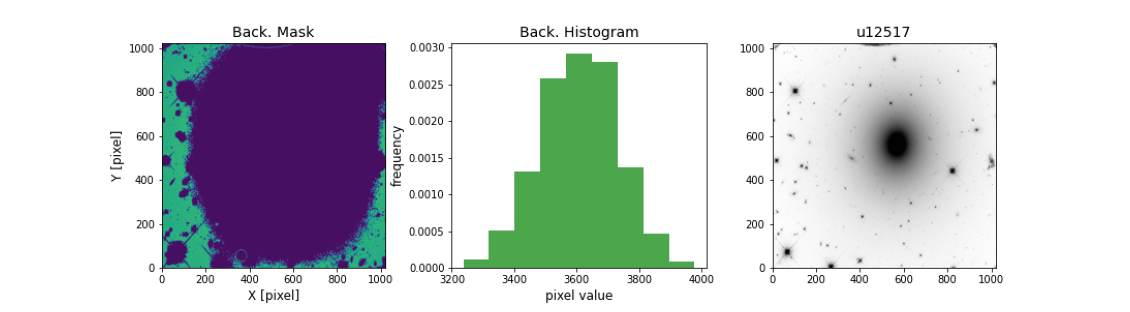

In [11]:
_, ax = plt.subplots(figsize=(20,10))
im = img.imread(objRoot+name+"_initial_back.png")
ax.imshow(im)
plt.axis('off')

(-0.5, 1151.5, 287.5, -0.5)

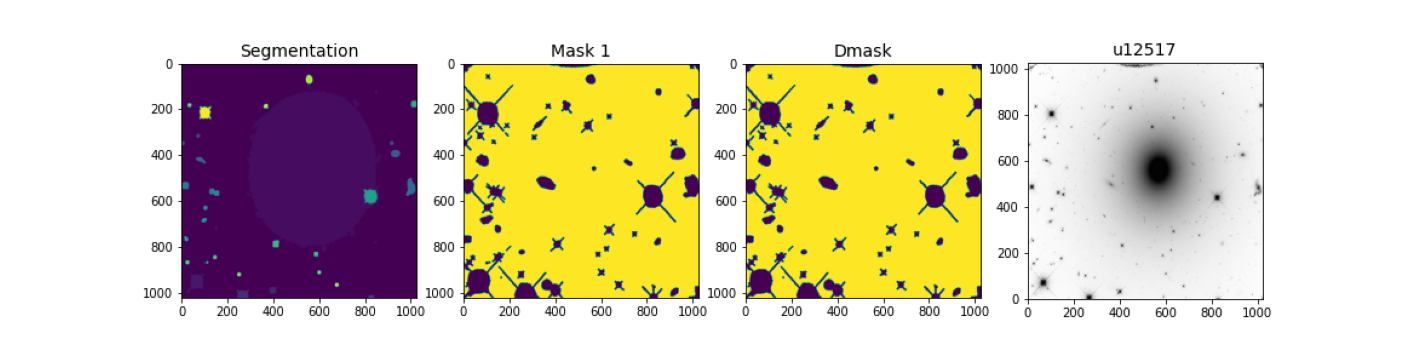

In [12]:
_, ax = plt.subplots(figsize=(25,10))
im = img.imread(objRoot+name+"_initial_mask.png")
ax.imshow(im)
plt.axis('off')

(-0.5, 1151.5, 287.5, -0.5)

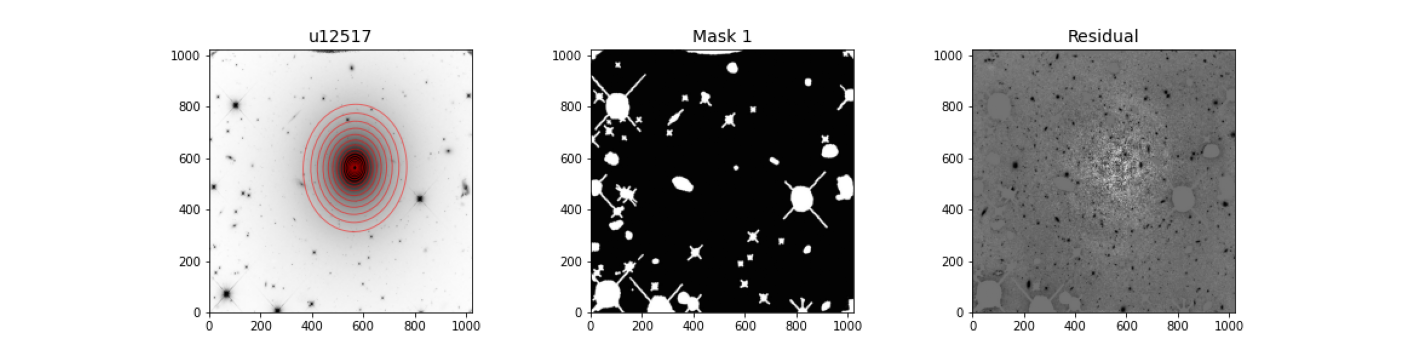

In [13]:
_, ax = plt.subplots(figsize=(25,10))
im = img.imread(objRoot+name+"_basic_model.png")
ax.imshow(im)
plt.axis('off')

(-0.5, 935.5, 935.5, -0.5)

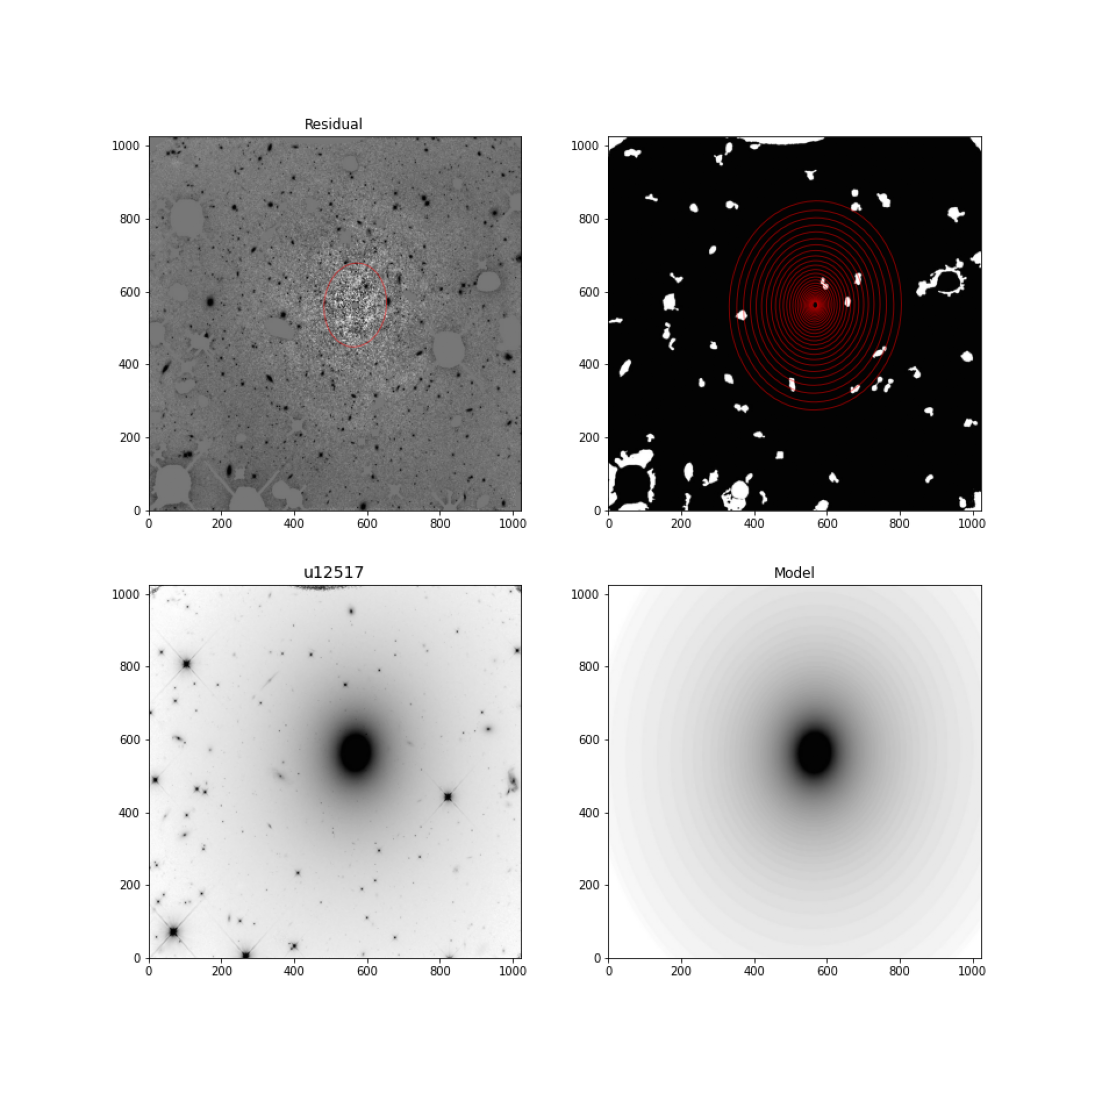

In [14]:
_, ax = plt.subplots(figsize=(20,20))
im = img.imread(objRoot+name+"_initial_model.png")
ax.imshow(im)
plt.axis('off')

(-0.5, 359.5, 359.5, -0.5)

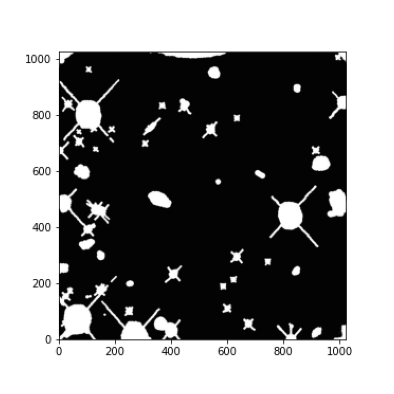

In [15]:
_, ax = plt.subplots(figsize=(7,7))

figName = objRoot+'/'+name+'_combined_mask.png'
im = img.imread(figName)
ax.imshow(im)
plt.axis('off')

(-0.5, 863.5, 359.5, -0.5)

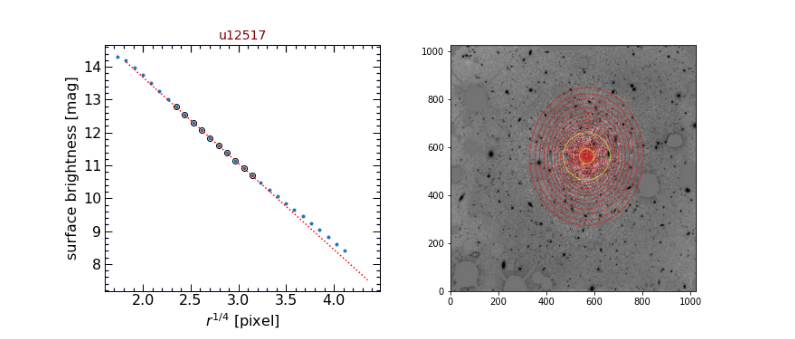

In [16]:
_, ax = plt.subplots(figsize=(14,7))

figName = objRoot+'/'+name+'_light_profile.png'
im = img.imread(figName)
ax.imshow(im)
plt.axis('off')

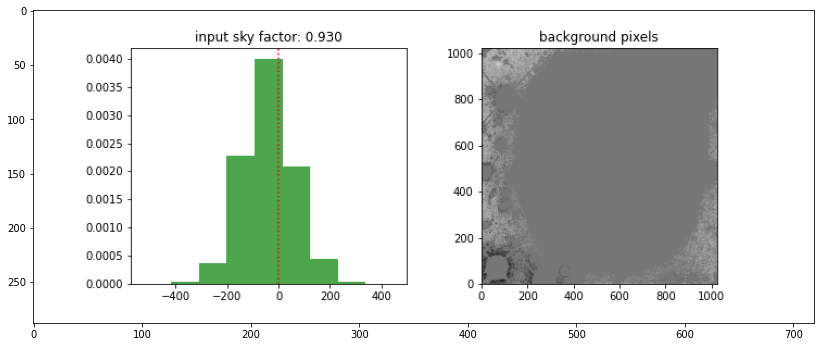

In [17]:
_, ax = plt.subplots(figsize=(14,7))

figName = objRoot+'/'+name+'_updated_back.png'
im = img.imread(figName)
ax.imshow(im)

   r0   r1  nr  n_cross  initial_sky_factor  final_sky_factor  model_no
0  10  436  43        3            0.895952          0.897820       999
1   9  319  24        2            0.868729          0.893350       998
2  13  286  27        0            0.807300          0.908677       997
3  10  339  25        0            0.851102          0.901147       996


,Unnamed: 0,r0,r1,nr,n_cross,sky_median,initial_sky_factor,final_sky_factor,final_sky,option,model_mask,model_no,object_root,residual_file,model_file,ellipse_file
0,0,10,436,43,3,3607.265137,0.895952,0.897820,3239.0,COS3X=0,0,999,/home/ehsan/PanStarrs/Jan/HI/augment/SBF/codes...,resid.999,model.999,elliprof.999
1,1,9,319,24,2,3607.265137,0.868729,0.893350,3223.0,COS3X=0,999,998,/home/ehsan/PanStarrs/Jan/HI/augment/SBF/codes...,resid.998,model.998,elliprof.998
2,2,13,286,27,0,3607.265137,0.807300,0.908677,3278.0,COS3X=0,998,997,/home/ehsan/PanStarrs/Jan/HI/augment/SBF/codes...,resid.997,model.997,elliprof.997
3,3,10,339,25,0,3607.265137,0.851102,0.901147,3251.0,COS3X=0,997,996,/home/ehsan/PanStarrs/Jan/HI/augment/SBF/codes...,resid.996,model.996,elliprof.996


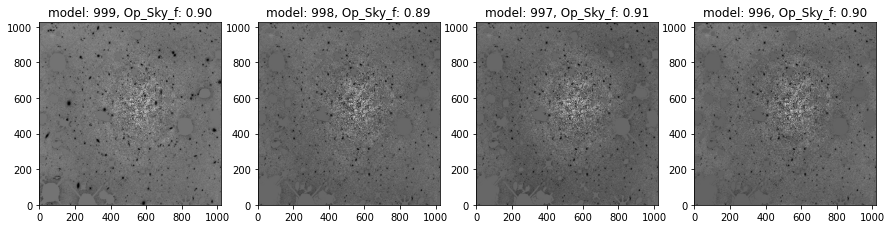

In [18]:
plot_scale = 'sqrt'    # 'log'
csv_name = objRoot+'/'+name+'_iterative_sky_optimizer.csv'

ncols = 4    # the number of panels in each row


if exists(csv_name):
    
    df = pd.read_csv(csv_name)
    for col in df.columns:
        df = df.rename(columns={col:col.strip()})
    
    n = len(df)
    nrows = n//ncols
    if n%ncols != 0: nrows += 1
    

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15,15))
    axes = axes.reshape((nrows, ncols))

    t = 0 
    for i in range(nrows):
        for j in range(ncols):
            
            if t>=n:
                continue

            ax = axes[i][j]
            model_no = df["model_no"][t]
            op_sky_f = df["final_sky_factor"][t]
            
            resid_file = objRoot+'/resid'+'.%03d'%model_no
            tv(fits_name=resid_file, ax=ax, options=plot_scale)
            
            ax.set_title("model: %d, Op_Sky_f: %.2f"%(model_no, op_sky_f))
                
            t+=1
    
    print(df[["r0", "r1", "nr", "n_cross", "initial_sky_factor", "final_sky_factor", "model_no"]])
    
    display(df)

In [19]:
## Internal parameters (sliders and setup)

params

{'backSextract': {'threshold': 0.03},
 'naiveSextract': {'minarea': 200.0, 'threshold': 3.0, 'smooth': 5.0},
 'basic_elliprof': {'r0': 9.0,
  'c_kron': 2.5,
  'sky_factor': 0.9,
  'k_ellipse': 15.0,
  'option': 'COS3X=0'},
 'second_elliprof': {'r0': 9.0,
  'c_kron': 2.9,
  'sky_factor': 0.9,
  'k_ellipse': 10.0,
  'option': 'COS3X=0',
  'minarea': 300.0,
  'threshold': 3.0,
  'smooth': 5.0,
  'renuc': 1.0}}